.ipynb settings

In [11]:
#Settings relative to .ipynb file format that have to be executed here

#Make reloading of modules automatic et évite d'avoir à redémarer le kernel et tout re executer pour appliquer la modification d'un module dans __main__.
%load_ext autoreload  
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
#src.useful_functions
import sys
sys.path.append('../src')  # Adjust the path to import modules in src/

import useful_functions



# I) <u> Raw data importation, visualisation, preprocessing  </u>

<span style="color:#FF1493;"> <strong> <font size="4">1) Import csv data</font>

In [14]:
#src.data.make_dataset

from data import make_dataset

Footy_stats_files = [make_dataset.footy_2015_adr, make_dataset.footy_2016_adr,
                     make_dataset.footy_2017_adr, make_dataset.footy_2018_adr, 
                     make_dataset.footy_2019_adr, make_dataset.footy_2020_adr,
                     make_dataset.footy_2021_adr, make_dataset.footy_2022_adr, 
                     make_dataset.footy_2023_adr, make_dataset.footy_2024_adr]

Football_data_files = [make_dataset.football_data_2015_adr, make_dataset.football_data_2016_adr,
                       make_dataset.football_data_2017_adr, make_dataset.football_data_2018_adr,
                       make_dataset.football_data_2019_adr, make_dataset.football_data_2020_adr,
                       make_dataset.football_data_2021_adr, make_dataset.football_data_2022_adr,
                       make_dataset.football_data_2023_adr, make_dataset.football_data_2024_adr]

# convert csv files into big dataframes
# Footy dataset
footy_dataset_to_save_01 = make_dataset.read_data(Footy_stats_files, 'footy')
# Football-Data dataset
football_data_dataset_to_save_01 = make_dataset.read_data(Football_data_files, 'football data')

#We delete a line full of Nan values
football_data_dataset_to_save_01.drop(760, inplace = True)
football_data_dataset_to_save_02 = football_data_dataset_to_save_01.reset_index(drop=False)



# We save the dataframes created into data/interim folder, after having deleted the old ones.
#Footy Stats dataset
make_dataset.save_dataframe(footy_dataset_to_save_01, 'interim/footy_ds_interim')
#Football-Data dataset
make_dataset.save_dataframe(football_data_dataset_to_save_02, 'interim/football_data_ds_interim')

The dataframes are the same for both old and new interim/footy_ds_interim
Successfully deleted the old file:               interim/footy_ds_interim
Successfully saved the new dataframe:            interim/footy_ds_interim
The dataframes are the same for both old and new interim/football_data_ds_interim
Successfully deleted the old file:               interim/football_data_ds_interim
Successfully saved the new dataframe:            interim/football_data_ds_interim


<span style="color:#FF1493;"> <strong> <font size="4">2) Combine data of 'Footy Stats' and 'Football Data' datasets</font>

In [15]:
#src.data.data_combination

from data import data_combination

# Open the dataframes saved
# Footy dataset
dataset_footy_01 = make_dataset.load_data(True, 'interim/footy_ds_interim')
# Footabll Data dataset
dataset_football_data_01 = make_dataset.load_data(True, 'interim/football_data_ds_interim')


# Uniformise teams names
dataset_football_data_02, dataset_footy_02 = data_combination.team_names_uniformisation(dataset_football_data_01.copy(), dataset_footy_01.copy())

# Replace Footy Stats shots by the values of Football Data
dataset_footy_03 = data_combination.replace_col_values('home_team_shots', 'HS', dataset_footy_02.copy(), dataset_football_data_02.copy())
dataset_footy_04 = data_combination.replace_col_values('away_team_shots', 'AS', dataset_footy_03.copy(), dataset_football_data_02.copy())
# Replace Footy Stats shots_on_target by the values of Football Data
dataset_footy_05 = data_combination.replace_col_values('home_team_shots_on_target', 'HST', dataset_footy_04.copy(), dataset_football_data_02.copy())
dataset_footy_06 = data_combination.replace_col_values('away_team_shots_on_target', 'AST', dataset_footy_05.copy(), dataset_football_data_02.copy())

dataset_00 = dataset_footy_06

The footy_ds_interim dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
The football_data_ds_interim dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


In the column home_team_shots of footy_dataset, 3507 values were modified, 1 were not because the corresponding value in football_data_dataset was Nan.
In the column away_team_shots of footy_dataset, 3507 values were modified, 1 were not because the corresponding value in football_data_dataset was Nan.
In the column home_team_shots_on_target of footy_dataset, 3507 values were modified, 1 were not because the corresponding value in football_data_dataset was Nan.
In the column away_team_shots_on_target of footy_dataset, 3507 values were modified, 1 were not because the corresponding value in football_data_dataset was Nan.


<span style="color:#FF1493;"> <strong> <font size="4">3)Imputation</font>

In [16]:
#src.data.preprocessing
from data import preprocessing

# We select the features we want to use to conduct imputation on xg
features_fo_HT_xg_imputation = ['home_team_goal_count', 'home_team_corner_count', 'odds_ft_home_team_win', 'home_team_shots', 'home_team_shots_on_target', 'home_team_possession']
features_fo_AT_xg_imputation = ['away_team_goal_count', 'away_team_corner_count', 'odds_ft_away_team_win', 'away_team_shots', 'away_team_shots_on_target', 'away_team_possession']

#Data imputation for XG:
dataset_001 = preprocessing.imputation('team_a_xg', features_fo_HT_xg_imputation, dataset_00.copy())
dataset_01 = preprocessing.imputation('team_b_xg', features_fo_AT_xg_imputation, dataset_001.copy())


# We test if the previous action has not modified other col than the ones we immputed
useful_functions.compare_2_df_excepted_col(['team_a_xg'], dataset_00.copy(), dataset_001.copy(), 'dataset_00', 'dataset_001')
useful_functions.compare_2_df_excepted_col(['team_b_xg'], dataset_001.copy(), dataset_01.copy(), 'dataset_001', 'dataset_01')



The DataFrames dataset_00 and dataset_001 are equal except for columns ['team_a_xg']
The DataFrames dataset_001 and dataset_01 are equal except for columns ['team_b_xg']


True

<span style="color:#FF1493;"> <strong> <font size="4">4) Visualize raw data</font>

In [17]:
#src.visualization.visualize
"""
if __name__ == '__main__':
    from visualization import visualize


#There are several functions to run in this module that are very specific. They are made to identify specific features outliers. We better have to go to the module to run it.

visualize.plot_all_num_features(dataset_01.copy(), save = False, density_estimate = False)
"""

"\nif __name__ == '__main__':\n    from visualization import visualize\n\n\n#There are several functions to run in this module that are very specific. They are made to identify specific features outliers. We better have to go to the module to run it.\n\nvisualize.plot_all_num_features(dataset_01.copy(), save = False, density_estimate = False)\n"

# II) <u> Features engineering  </u>

<span style="color:#FF1493;"> <strong> <font size="4">1) Create columns for new features:</font>

In [18]:
#features.initialize_new_features_columns

if __name__ == '__main__':
    from features import initialize_new_features_columns

#We create the new columns in dataset and stock the columns ranks variables into dico_col_rk
dataset_02, dico_col_rk = initialize_new_features_columns.add_columns_and_complete_col_ranks(dataset_01.copy())

#We execute a test to verify the columns and columns ranks variables have been correcctly created
initialize_new_features_columns.test_columns_ranks(dico_col_rk, theoritical_df_col_nb = 203, dataset_0 = dataset_02.copy())


the function add_columns_and_complete_col_ranks() was executed correctly


True

<span style="color:#FF1493;"> <strong> <font size="4"> 2) Create new features:</font>

<span style="color:#FF1493;">
<font size="3"> 
    Création/Manipulation des Statistiques de Resultat
</span style="color:#FF1493;"> </font size="4">

(pm = pre-match)
(sbos = since the beginning of the season)

In [19]:
#src.features.make_new_features
if __name__ == '__main__':
    from features import make_new_features


#We add the matchs results 
dataset_03 = make_new_features.matchs_results(dataset_02.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['RH',
                                            'RA'], dataset_02.copy(), dataset_03.copy(), 'dataset_02', 'dataset_03')


#We add the Home or Away status of the teams
dataset_04 = make_new_features.home_away_status(dataset_03.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_H_A_status',
                                            'AT_H_A_status'], dataset_03.copy(), dataset_04.copy(), 'dataset_03', 'dataset_04')


#Calculation and manipulation of NB DE MATCHS et NB DE VICTOIRES (pm, sbos)
#VARIABLES                    V 
# We add the number of matches and number of victories
dataset_05 = make_new_features.nb_matchs_nb_victories(dico_col_rk.copy(), dataset_04.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_played_matchs_nb',
                                            'AT_played_matchs_nb',
                                            'HT_victories_nb',
                                            'AT_victories_nb'], dataset_04.copy(), dataset_05.copy(), 'dataset_04', 'dataset_05')

#Calculation and manipulation of VICTORY (pm, sbos):
#VARIABLE                     X
#PER MATCH AVG                V 
#PER MATCH AVG HT/AT DIFF     V
#We add the avg victories per match and its HT-AT difference
dataset_06 = make_new_features.victories_per_match_AVG_and_DIFF(dataset_05.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_avg_victory_pm',
                                            'AT_avg_victory_pm',
                                            'Diff_HT_avg_victory_pm',
                                            'Diff_AT_avg_victory_pm'], dataset_05.copy(), dataset_06.copy(), 'dataset_05', 'dataset_06')

#(POINTS COLLECTED x (1 + ADVERSARY AVG VICTORY PER MATCH)) (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the avg points per match ponderated by adversary perf, and its HT-AT difference
dataset_07 = make_new_features.points_pm_ponderated_by_adversary_perf(dico_col_rk.copy(), dataset_06.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_points_ponderated_by_adversary_perf',
                                            'AT_points_ponderated_by_adversary_perf',
                                            'HT_avg_pm_points_ponderated_by_adversary_perf',  
                                            'AT_avg_pm_points_ponderated_by_adversary_perf', 'HT_Diff_points_ponderated_by_adversary_perf', 'AT_Diff_points_ponderated_by_adversary_perf'], dataset_06.copy(), dataset_07.copy(), 'dataset_06', 'dataset_07')

#Calculation and manipulation of NB OF SCORED GOALS and NB CONCEDED GOALS (pm, sbos)
#VARRIABLE                    V
#We add the nb of goals scored and conceded
dataset_08 = make_new_features.scored_and_conceded_goals(dico_col_rk.copy(), dataset_07.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['scored_goals_HT_PM',
                                            'conceded_goals_HT_PM',
                                            'scored_goals_AT_PM',  
                                            'conceded_goals_AT_PM'], dataset_07.copy(), dataset_08.copy(), 'dataset_07', 'dataset_08')


#GOAL DIFFERENCE (pm, sbos): 
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the goal difference
dataset_09 = make_new_features.goal_difference(dataset_08.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['goal_diff_HT_PM',
                                            'goal_diff_AT_PM',
                                            'HT_avg_goal_diff_pm',  
                                            'AT_avg_goal_diff_pm',
                                            'Diff_HT_goal_diff_pm',
                                            'Diff_AT_goal_diff_pm'], dataset_08.copy(), dataset_09.copy(), 'dataset_08', 'dataset_09')


#SCORED GOALS / CONCEDED GOALS (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                X 
#HT/AT DIFF                   V
#We add the ratio scored goals/conceded goals
dataset_10 = make_new_features.scored_conceded_goals_ratio(dataset_09.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_avg_scored_g_conceded_g_ratio',
                                            'AT_avg_scored_g_conceded_g_ratio',
                                            'Diff_HT_avg_scored_g_conceded_g_ratio',  
                                            'Diff_AT_avg_scored_g_conceded_g_ratio'], dataset_09.copy(), dataset_10.copy(), 'dataset_09', 'dataset_10')


#POINTS NB (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the points number
dataset_11 = make_new_features.points_nb(dico_col_rk.copy(),dataset_10.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['Prematch_HT_PN',
                                            'Prematch_AT_PN',
                                            'HT_avg_collected_points_pm',  
                                            'AT_avg_collected_points_pm',
                                            'Diff_pnt_HT_ratio',
                                            'Diff_pnt_AT_ratio'], dataset_10.copy(), dataset_11.copy(), 'dataset_10', 'dataset_11')



#RANKING (pm, sbos) :
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add ranks prematch
dataset_12 = make_new_features.ranking(dico_col_rk.copy(), dataset_11.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_week_ranking',
                                            'AT_week_ranking',
                                            'Diff_HT_ranking',  
                                            'Diff_AT_ranking'], dataset_11.copy(), dataset_12.copy(), 'dataset_11', 'dataset_12')


#ANNUAL BUDGET:
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the annual budgets of teams
dataset_13 = make_new_features.annnual_budget(dataset_12.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['annual budget of HT',
                                            'annual budget of AT',
                                            'Diff_HT_annual_budget',  
                                            'Diff_AT_annual_budget'], dataset_12.copy(), dataset_13.copy(), 'dataset_12', 'dataset_13')
#We test if there is no 0 values in the columns
useful_functions.is_there_x_values(0, ['annual budget of HT','annual budget of AT'], dataset_13.copy())


#POINTS NB ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the points nb on 1,3,5 last matchs
dataset_14 = make_new_features.points_nb_on_x_last_matchs(dico_col_rk.copy(), dataset_13.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['Points_HT_5lm_PM',
                                            'Points_AT_5lm_PM',
                                            'Points_HT_3lm_PM',
                                            'Points_AT_3lm_PM',
                                            'Points_HT_1lm_PM',
                                            'Points_AT_1lm_PM',
                                            'HT_Diff_Points_5lm',  
                                            'AT_Diff_Points_5lm',
                                            'HT_Diff_Points_3lm',
                                            'AT_Diff_Points_3lm',
                                            'HT_Diff_Points_1lm',
                                            'AT_Diff_Points_1lm'], dataset_13.copy(), dataset_14.copy(), 'dataset_13', 'dataset_14')


#GOAL DIFF ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the goal diff on 1,3,5 last matches
dataset_15 = make_new_features.goal_diff_on_x_last_matchs(dico_col_rk.copy(), dataset_14.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['GoalDiff_HT_5lm_PM',
                                            'GoalDiff_AT_5lm_PM',
                                            'GoalDiff_HT_3lm_PM',
                                            'GoalDiff_AT_3lm_PM',
                                            'GoalDiff_HT_1lm_PM',
                                            'GoalDiff_AT_1lm_PM',
                                            'HT_Diff_Goal_Diff_5lm',  
                                            'AT_Diff_Goal_Diff_5lm',
                                            'HT_Diff_Goal_Diff_3lm',
                                            'AT_Diff_Goal_Diff_3lm',
                                            'HT_Diff_Goal_Diff_1lm',
                                            'AT_Diff_Goal_Diff_1lm'], dataset_14.copy(), dataset_15.copy(), 'dataset_14', 'dataset_15')


#RANKING ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the ranking on 1,3,5 last matches
dataset_16 = make_new_features.ranking_on_x_last_matchs(dico_col_rk.copy(), dataset_15.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_5lm_week_ranking',
                                            'AT_5lm_week_ranking',
                                            'HT_3lm_week_ranking',
                                            'AT_3lm_week_ranking',
                                            'HT_1lm_week_ranking',
                                            'AT_1lm_week_ranking',
                                            "Diff_HT_ranking_5lm",
                                            "Diff_AT_ranking_5lm",
                                            "Diff_HT_ranking_3lm",
                                            "Diff_AT_ranking_3lm",
                                            "Diff_HT_ranking_1lm",
                                            "Diff_AT_ranking_1lm"], dataset_15.copy(), dataset_16.copy(), 'dataset_15', 'dataset_16')

#We add the season of each match
#VARIABLE
dataset_17 = make_new_features.season_year(dataset_16.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['Season_year'], dataset_16.copy(), dataset_17.copy(), 'dataset_16', 'dataset_17')


The DataFrames dataset_02 and dataset_03 are equal except for columns ['RH', 'RA']
The DataFrames dataset_03 and dataset_04 are equal except for columns ['HT_H_A_status', 'AT_H_A_status']


The DataFrames dataset_04 and dataset_05 are equal except for columns ['HT_played_matchs_nb', 'AT_played_matchs_nb', 'HT_victories_nb', 'AT_victories_nb']
The DataFrames dataset_05 and dataset_06 are equal except for columns ['HT_avg_victory_pm', 'AT_avg_victory_pm', 'Diff_HT_avg_victory_pm', 'Diff_AT_avg_victory_pm']
The DataFrames dataset_06 and dataset_07 are equal except for columns ['HT_points_ponderated_by_adversary_perf', 'AT_points_ponderated_by_adversary_perf', 'HT_avg_pm_points_ponderated_by_adversary_perf', 'AT_avg_pm_points_ponderated_by_adversary_perf', 'HT_Diff_points_ponderated_by_adversary_perf', 'AT_Diff_points_ponderated_by_adversary_perf']
The DataFrames dataset_07 and dataset_08 are equal except for columns ['scored_goals_HT_PM', 'conceded_goals_HT_PM', 'scored_goals_AT_PM', 'conceded_goals_AT_PM']
The DataFrames dataset_08 and dataset_09 are equal except for columns ['goal_diff_HT_PM', 'goal_diff_AT_PM', 'HT_avg_goal_diff_pm', 'AT_avg_goal_diff_pm', 'Diff_HT_goal_d

True

<span style="color:#FF1493;">
<font size="3"> 
    Création/Manipulation des Statistiques de Jeu

In [20]:
#src.features.make_new_features

#CORNERS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    V
dataset_18 = make_new_features.corners_nb(dico_col_rk.copy(), dataset_17.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_corners_nb',
                                            'AT_corners_nb',
                                            'HT_Diff_avg_corners_nb',
                                            'AT_Diff_avg_corners_nb'], dataset_17.copy(), dataset_18.copy(), 'dataset_17', 'dataset_18')

#YELLOW, RED CARDS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    V
dataset_19 = make_new_features.yellow_red_cards(dico_col_rk.copy(), dataset_18.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_yellow_cards_nb',
                                            'AT_yellow_cards_nb',
                                            'HT_red_cards_nb',
                                            'AT_red_cards_nb',
                                            'HT_Diff_avg_yellow_cards_nb',
                                            'AT_Diff_avg_yellow_cards_nb',
                                            'HT_Diff_avg_red_cards_nb',
                                            'AT_Diff_avg_red_cards_nb',], dataset_18.copy(), dataset_19.copy(), 'dataset_18', 'dataset_19')

#SHOTS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_20 = make_new_features.shots_nb(dico_col_rk.copy(), dataset_19.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_shots_nb',
                                            'AT_shots_nb',
                                            'HT_avg_shots_nb',
                                            'AT_avg_shots_nb',
                                            'HT_Diff_avg_shots_nb',
                                            'AT_Diff_avg_shots_nb'], dataset_19.copy(), dataset_20.copy(), 'dataset_19', 'dataset_20')

#SHOTS ON TARGET NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_21 = make_new_features.shots_on_target_nb(dico_col_rk.copy(), dataset_20.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_shots_on_target_nb',
                                            'AT_shots_on_target_nb',
                                            'HT_avg_shots_on_target_nb',
                                            'AT_avg_shots_on_target_nb',
                                            'HT_Diff_avg_shots_on_target_nb',
                                            'AT_Diff_avg_shots_on_target_nb'], dataset_20.copy(), dataset_21.copy(), 'dataset_20', 'dataset_21')

#FOULS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_22 = make_new_features.fouls_nb(dico_col_rk.copy(), dataset_21.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_fouls_nb',
                                            'AT_fouls_nb',
                                            'HT_avg_fouls_nb',
                                            'AT_avg_fouls_nb',
                                            'HT_Diff_avg_fouls_nb',
                                            'AT_Diff_avg_fouls_nb'], dataset_21.copy(), dataset_22.copy(), 'dataset_21', 'dataset_22')

#POSSESSION (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_23 = make_new_features.possession(dico_col_rk.copy(), dataset_22.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_possession',
                                            'AT_possession',
                                            'HT_avg_possession',
                                            'AT_avg_possession',
                                            'HT_Diff_avg_possession',
                                            'AT_Diff_avg_possession'], dataset_22.copy(), dataset_23.copy(), 'dataset_22', 'dataset_23')

#EXPECTED GOALS / XG (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_24 = make_new_features.expected_goals(dico_col_rk.copy(), dataset_23.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_xg',
                                            'AT_xg',
                                            'HT_avg_xg',
                                            'AT_avg_xg',
                                            'HT_Diff_avg_xg',
                                            'AT_Diff_avg_xg'], dataset_23.copy(), dataset_24.copy(), 'dataset_23', 'dataset_24')

The DataFrames dataset_17 and dataset_18 are equal except for columns ['HT_corners_nb', 'AT_corners_nb', 'HT_Diff_avg_corners_nb', 'AT_Diff_avg_corners_nb']
The DataFrames dataset_18 and dataset_19 are equal except for columns ['HT_yellow_cards_nb', 'AT_yellow_cards_nb', 'HT_red_cards_nb', 'AT_red_cards_nb', 'HT_Diff_avg_yellow_cards_nb', 'AT_Diff_avg_yellow_cards_nb', 'HT_Diff_avg_red_cards_nb', 'AT_Diff_avg_red_cards_nb']
The DataFrames dataset_19 and dataset_20 are equal except for columns ['HT_shots_nb', 'AT_shots_nb', 'HT_avg_shots_nb', 'AT_avg_shots_nb', 'HT_Diff_avg_shots_nb', 'AT_Diff_avg_shots_nb']
The DataFrames dataset_20 and dataset_21 are equal except for columns ['HT_shots_on_target_nb', 'AT_shots_on_target_nb', 'HT_avg_shots_on_target_nb', 'AT_avg_shots_on_target_nb', 'HT_Diff_avg_shots_on_target_nb', 'AT_Diff_avg_shots_on_target_nb']
The DataFrames dataset_21 and dataset_22 are equal except for columns ['HT_fouls_nb', 'AT_fouls_nb', 'HT_avg_fouls_nb', 'AT_avg_fouls_nb',

True

<span style="color:#FF1493;">
<font size="3"> 
    Création/Manipulation des Statistiques de Côte

In [21]:
#src.features.make_new_features

# 1/VICTORY ODDS  (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_25 = make_new_features.odds_victory_proba(dico_col_rk.copy(), dataset_24.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_odds_victory_proba',
                                            'AT_odds_victory_proba',
                                            'HT_avg_odds_victory_proba',
                                            'AT_avg_odds_victory_proba',
                                            'HT_Diff_avg_odds_victory_proba',
                                            'AT_Diff_avg_odds_victory_proba'], dataset_24.copy(), dataset_25.copy(), 'dataset_24', 'dataset_25')

#Max odd
#Variable
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    X
dataset_26 = make_new_features.max_odd(dataset_25.copy(),  dataset_football_data_02.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HTW_Max_odd',
                                            'ATW_Max_odd',
                                            'D_Max_odd'], dataset_25.copy(), dataset_26.copy(), 'dataset_25', 'dataset_26')

#Avg odd
#Variable
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    X
dataset_27 = make_new_features.avg_odd(dataset_26.copy(),  dataset_football_data_02.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HTW_avg_odd',
                                            'ATW_avg_odd',
                                            'D_avg_odd'], dataset_26.copy(), dataset_27.copy(), 'dataset_26', 'dataset_27')

#Defining a dataframe that contains the data after features engineering
feat_engineered_ds = dataset_27

The DataFrames dataset_24 and dataset_25 are equal except for columns ['HT_odds_victory_proba', 'AT_odds_victory_proba', 'HT_avg_odds_victory_proba', 'AT_avg_odds_victory_proba', 'HT_Diff_avg_odds_victory_proba', 'AT_Diff_avg_odds_victory_proba']
The DataFrames dataset_25 and dataset_26 are equal except for columns ['HTW_Max_odd', 'ATW_Max_odd', 'D_Max_odd']
The DataFrames dataset_26 and dataset_27 are equal except for columns ['HTW_avg_odd', 'ATW_avg_odd', 'D_avg_odd']


<span style="color:#FF1493;"> <strong> <font size="4">4) Save dataset and look for changes

In [23]:
#Save the dataset
make_dataset.save_dataframe(feat_engineered_ds, 'interim/feat_engineered_ds')

#src.tests
# A test made to spot changes in the whole dataframe between the dataframe created by the last iteration of the programm and the previous one saved
"""
import tests

tests.test_changes_on_dataset(feat_engineered_ds.copy(), 'feat_engineered_ds_test')
"""

The dataframes are the same for both old and new interim/feat_engineered_ds
Successfully deleted the old file:               interim/feat_engineered_ds
Successfully saved the new dataframe:            interim/feat_engineered_ds


"\nimport tests\n\ntests.test_changes_on_dataset(feat_engineered_ds.copy(), 'feat_engineered_ds_test')\n"

# V) <u> Preprocessing (out of pipeline)

<span style="color:#FF1493;"> <strong> <font size="4">1) Data Formatting and Splitting (definition of X and Y)

The interim/feat_engineered_ds dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
The dataframes are the same for both old and new processed/X_train_info
Successfully deleted the old file:               processed/X_train_info
Successfully saved the new dataframe:            processed/X_train_info


The dataframes are the same for both old and new processed/X_train_00
Successfully deleted the old file:               processed/X_train_00
Successfully saved the new dataframe:            processed/X_train_00


The dataframes are the same for both old and new processed/Y_train_00
Successfully deleted the old file:               processed/Y_train_00
Successfully saved the new dataframe:            processed/Y_train_00


The dataframes are the same for both old and new processed/X_test_info
Successfully deleted the old file:               processed/X_test_info
Successfully saved the new dataframe:            processed/X_test_info


The dataframes ar

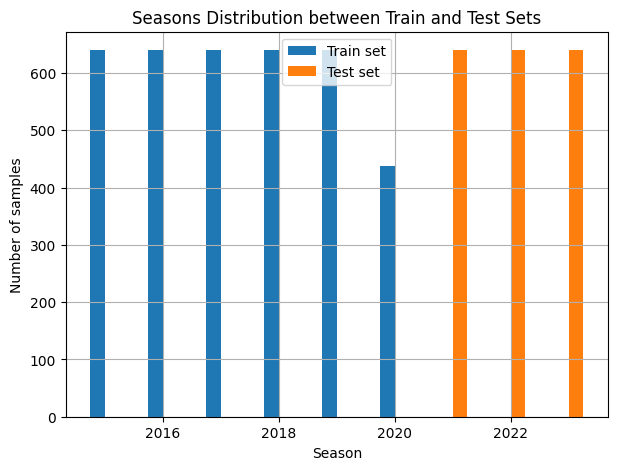

6


In [25]:
#src.data.preprocessing
from pyparsing import col

#Load the feat_engineered_ds:
feat_engineered_ds = make_dataset.load_data(True, 'interim/feat_engineered_ds')

# Define the col names we will put in X_train, X_test pipeline with the name we will give the concatnenation of HT and AT
names_col_to_concat = [ 'date_GMT', 'date_GMT',
                        "home_team_name", "away_team_name",
                        "away_team_name", "home_team_name",
                        "Diff_HT_avg_victory_pm", "Diff_AT_avg_victory_pm", 
                        "HT_Diff_points_ponderated_by_adversary_perf", "AT_Diff_points_ponderated_by_adversary_perf",
                        "Diff_HT_goal_diff_pm","Diff_AT_goal_diff_pm",
                        "Diff_HT_avg_scored_g_conceded_g_ratio","Diff_AT_avg_scored_g_conceded_g_ratio",
                        "Diff_pnt_HT_ratio","Diff_pnt_AT_ratio",
                        "Diff_HT_ranking","Diff_AT_ranking",
                        "Diff_HT_annual_budget","Diff_AT_annual_budget",
                        "HT_Diff_Points_5lm","AT_Diff_Points_5lm",
                        "Diff_HT_goal_diff_pm","Diff_AT_goal_diff_pm",
                        "Diff_HT_ranking_5lm","Diff_AT_ranking_5lm",
                        "HT_Diff_avg_corners_nb","AT_Diff_avg_corners_nb",
                        "HT_Diff_avg_shots_nb","AT_Diff_avg_shots_nb",
                        "HT_Diff_avg_shots_on_target_nb","AT_Diff_avg_shots_on_target_nb",
                        "HT_Diff_avg_fouls_nb","AT_Diff_avg_fouls_nb",
                        "HT_Diff_avg_possession","AT_Diff_avg_possession",
                        "HT_Diff_avg_xg","AT_Diff_avg_xg",
                        "HT_Diff_avg_odds_victory_proba","AT_Diff_avg_odds_victory_proba",
                        "HT_H_A_status", "AT_H_A_status", 
                        "Season_year", "Season_year",
                        "HT_played_matchs_nb", "AT_played_matchs_nb",
                        "HTW_Max_odd", "ATW_Max_odd",
                        "HTW_avg_odd", "ATW_avg_odd"]
names_col_concatenated =[  "Date",
                            "Team_we_pred_vict_proba",
                            "Adversary",
                            "Diff_Avg_victory",
                            "Diff_Avg_points_pm_ponderated_by_adversary_perf",
                            "Diff_Avg_goal_diff", 
                            "Diff_Avg_scored_g_conceeded_g_ratio",
                            "Diff_Avg_collected_points", 
                            "Diff_Week_ranking",
                            "Diff_Annual_budget",
                            "Diff_Points_5lm",
                            "Diff_Goal_Diff_5lm",
                            'Diff_Week_ranking_5lm',
                            'Diff_avg_corners_nb',
                            'Diff_Avg_shots_nb',
                            'Diff_Avg_shots_on_target_nb',
                            'Diff_Avg_fouls_nb',
                            'Diff_Avg_possession',
                            'Diff_Avg_xg',
                            'Diff_Avg_odds_victory_proba',
                            'H_A_status',
                            'Season_year',
                            'Played_matchs_nb',
                            'Max_victory_odd',
                            'Avg_victory_odd']
contextual_col =["Team_we_pred_vict_proba",
                "Adversary",
                "Date",
                "Played_matchs_nb",
                "Max_victory_odd",
                "Avg_victory_odd"]

# Define the names of the columns above that we don't want to include in X_train and X_test. (I know it's contradictory, but it's easier to simply add names here rather than deleting some in the two lists above and having to add them again if I change my mind.)
col_to_remove = ['Diff_Avg_odds_victory_proba', 'Diff_Avg_victory', 'Diff_Week_ranking' ]


# Formatting and splitting (with shuffle) dataset to get: train and test sets
"""
X_train_info, X_train_00, Y_train_00, X_test_info,  X_test_00, Y_test_00 = preprocessing.formatting_splitting_shuffle(
                                                                                   names_col_to_concat,
                                                                                   names_col_concatenated,
                                                                                   col_to_remove,
                                                                                   random_state_0 = 764,
                                                                                   dataset_0 = last_dataset_xx.copy(),
                                                                                   test_proportion = 0.6)
"""
# OR

test_seasons = [2021,2022,2023]
train_seasons = [2015, 2016, 2017, 2018, 2019, 2020]

# Formatting and splitting (following seasons) dataset to get: train and test sets
X_train_info, X_train_00, Y_train_00, X_test_info,  X_test_00, Y_test_00 = preprocessing.formatting_splitting_seasonally(names_col_to_concat, names_col_concatenated, col_to_remove, contextual_col, feat_engineered_ds.copy(), test_seasons, train_seasons)

   
# Visualize the seasons repartition in train, valid, test sets.
preprocessing.hist_seasons(X_train_00.copy(), X_test_00.copy())

# Saving  the datasets
make_dataset.save_dataframe(X_train_info, 'processed/X_train_info')
make_dataset.save_dataframe(X_train_00, 'processed/X_train_00')
make_dataset.save_dataframe(Y_train_00, 'processed/Y_train_00')
make_dataset.save_dataframe(X_test_info, 'processed/X_test_info')
make_dataset.save_dataframe(X_test_00, 'processed/X_test_00')
make_dataset.save_dataframe(Y_test_00, 'processed/Y_test_00')


<span style="color:#FF1493;"> <strong> <font size="4">3) Filter and Wrapper features selection (version out of the pipeline)

In [26]:
#src.features.features_selection

#This cell is made to test features selectors (Filter and Wrrapper), and conducting feature selection. We do it OUT OF THE PIPELINE beacause the execution of these features selectors significantly slow down the process (particularly for wrapper).
#Les tests doivent être faits sur X_train

#Wrapper features selection
#On définit le model qui va etre utilisé pour definir l'ultilité des features et qui va permettre de les sélectionner
from sklearn.linear_model import LogisticRegression
model_tester = LogisticRegression(max_iter=10000, C = 0.01, penalty = 'l2')
"""
X_wrapped = features_selection.wrapper_features_selection(X_train_00.copy(),Y_train_00.copy(), model_tester)
"""


#Filter features selection
from sklearn.feature_selection import f_classif
"""
X_filtered = features_selection.filter_features_selection(X_train_00.copy(),Y_train_00.copy(), 15, f_classif, True)
"""


'\nX_filtered = features_selection.filter_features_selection(X_train_00.copy(),Y_train_00.copy(), 15, f_classif, True)\n'

<span style="color:#808080;"> <strong> <font size="4">4) Outliers treatment (not used but kept in case...)

In [27]:
#src.data.preprocessing

#Deletting outliers frome train set
"""X_train_01, Y_train_01 = preprocessing.outliers_removal(X_0 = X_train_00.copy(), Y_0 = Y_train_00.copy(), iqr_multiplier = 1.9)"""

'X_train_01, Y_train_01 = preprocessing.outliers_removal(X_0 = X_train_00.copy(), Y_0 = Y_train_00.copy(), iqr_multiplier = 1.9)'